## Section 1: Three optimization problem

You will create or steal three optimization problems and run RHC, SA, GA, and MIMIC on your chosen optimization problems.

- ... with an additional constraint: Highlight each of GA, SA, and MIMIC in one of the respective optimization problems.
- **Hint:** These optimization problems are available in the corresponding library you chose above. You'll need to experiment with various problems and choose the appropriate ones that highlight one of the respective algorithms.

In [7]:
from src.utils import *

In [191]:
"""
OPTIMISATION PROBLEMS:
1. FourPeaks
2. FlipFlop
3. KnapSack
"""
def problem_fourpeaks(t_pct):
    return mlrose.FourPeaks(t_pct=t_pct)

def problem_flipflop():
    return mlrose.FlipFlop()

def problem_knapsack(weights, values, max_weight_pct):
    # default - weights = [10, 5, 2, 8, 15]
    # values = [1, 2, 3, 4, 5]
    # max_weight_pct = 0.6
    return mlrose.Knapsack(weights=weights, 
                           values=values,
                           max_weight_pct=max_weight_pct)
"""
SEARCH ALGORITHMS:
1. RHC
2. GA
3. SA
4. MIMIC
"""
# define search algorithms
def RHC(problem, max_attempts, max_iters, restarts, random_state):
    # default - max_attempts: int = 10, max_iters: float = np.inf,
    return mlrose.random_hill_climb(problem, max_attempts=max_attempts, 
                             max_iters=max_iters, restarts=restarts, 
                             init_state=None, curve=True, 
                             random_state=random_state)

def GA(problem, pop_size, mutate_prob, max_attempt, max_iters, random_state):
    # default - pop_size = 200, mutate_prob=0.1, max_attempt=10
    return mlrose.genetic_alg(problem, pop_size=pop_size, 
                              mutation_prob=mutate_prob, max_attempts=max_attempt, 
                              max_iters=max_iters, curve=True, 
                              random_state=random_state)

def SA(problem, schedule, max_attempts, max_iters, random_state):
    # default - schedule: GeomDecay = GeomDecay(), max_attempts: int = 10,
    return mlrose.simulated_annealing(problem, schedule = schedule,
                                      max_attempts=max_attempts, max_iters=max_iters,
                                      init_state=None, curve=True,
                                      random_state=random_state)

def MIMIC(problem, pop_size, keep_pct, max_attempts, max_iters, random_state):
    # default - keep_pct: float = 0.2, max_attempts: int = 10
    return mlrose.mimic(problem, pop_size = pop_size, max_iters = max_iters,
                        keep_pct = keep_pct, max_attempts=max_attempts, curve=True,
                        random_state = random_state)

## Hyperparameter tuning
Perform hyperparameter tuning across all 3 problems

In [211]:
def run_rhc_experiment(length, fitness, experiment_params, verbose=True):

    print(f'RHC Experiment for length: {length}') if verbose else next
    # initialise parameters
    exp_list = generate_parameter_list(experiment_params)
    best_fitness = 0
    best_state = None
    best_fitness_curve = None
    best_params = {}

    # experiments
    for exp in exp_list:
        problem = mlrose.DiscreteOpt(length = length, fitness_fn = fitness,
            maximize = True, max_val = 2)
        algo = exp['algo']

        max_attempts_param = exp['max_attempts_param']
        max_iters_param = exp['max_iters_param']
        restarts_param = exp['restarts_param']

        elapsed_time, output = CalcTime(algo, problem, max_attempts_param, max_iters_param, restarts_param, SEED_NUM)
        state_rhc, fitness_rhc, fitness_curve_rhc = output
        if fitness_rhc > best_fitness:
            best_fitness = fitness_rhc
            best_state = state_rhc
            best_fitness_curve = fitness_curve_rhc

            best_params['algo'] = 'RHC'
            best_params['best_max_attempts'] = max_attempts_param
            best_params['best_max_iters'] = max_iters_param
            best_params['best_wall_clock_time'] = elapsed_time
            best_params['best_state'] = best_state
            best_params['best_fitness_curve'] = best_fitness_curve
            best_params['best_fitness_score'] = best_fitness
    
    # print(best_params) if verbose else next
    return best_params


def run_sa_experiment(length, fitness, experiment_params, verbose=True):

    print(f'SA Experiment for length: {length}') if verbose else next
    # initialise parameters
    exp_list = generate_parameter_list(experiment_params)
    best_fitness = 0
    best_state = None
    best_fitness_curve = None
    best_params = {}

    # experiments
    for exp in exp_list:
        problem = mlrose.DiscreteOpt(length = length, fitness_fn = fitness,
            maximize = True, max_val = 2)
        
        algo = exp['algo']
        max_attempts_param = exp['max_attempts_param']
        max_iters_param = exp['max_iters_param']
        init_temp_param = exp['init_temp_param']
        decay_param = exp['decay_param']
        min_temp_param = exp['min_temp_param']
        schedule = mlrose.GeomDecay(init_temp=init_temp_param, decay=decay_param, min_temp=min_temp_param)

        elapsed_time, output = CalcTime(algo, problem, schedule, max_attempts_param, max_iters_param, SEED_NUM)
        state, fitness_score, fitness_curve = output
        if fitness_score > best_fitness:
            best_fitness = fitness_score
            best_state = state
            best_fitness_curve = fitness_curve

            best_params['algo'] = 'SA'
            best_params['best_max_attempts'] = max_attempts_param
            best_params['best_max_iters'] = max_iters_param
            best_params['best_init_temp'] = init_temp_param
            best_params['best_decay'] = decay_param
            best_params['best_min_temp'] = min_temp_param
            best_params['best_wall_clock_time'] = elapsed_time
            best_params['best_state'] = best_state
            best_params['best_fitness_curve'] = best_fitness_curve
            best_params['best_fitness_score'] = best_fitness
    
    # print(best_params) if verbose else next
    return best_params


def run_ga_experiment(length, fitness, experiment_params, verbose=True):

    print(f'GA Experiment for length: {length}') if verbose else next
    # initialise parameters
    exp_list = generate_parameter_list(experiment_params)
    best_fitness = 0
    best_state = None
    best_fitness_curve = None
    best_params = {}

    # experiments
    for exp in exp_list:
        problem = mlrose.DiscreteOpt(length = length, fitness_fn = fitness,
            maximize = True, max_val = 2)
        
        algo = exp['algo']
        max_attempts_param = exp['max_attempts_param']
        max_iters_param = exp['max_iters_param']
        pop_size_param = exp['pop_size_param']
        mutation_prob_param = exp['mutation_prob_param']

        elapsed_time, output = CalcTime(algo, problem, pop_size_param, mutation_prob_param, max_attempts_param, max_iters_param, SEED_NUM)
        state, fitness_score, fitness_curve = output
        if fitness_score > best_fitness:
            best_fitness = fitness_score
            best_state = state
            best_fitness_curve = fitness_curve

            best_params['algo'] = 'GA'
            best_params['best_max_attempts'] = max_attempts_param
            best_params['best_max_iters'] = max_iters_param

            best_params['best_pop_size'] = pop_size_param
            best_params['best_mutation_prob'] = mutation_prob_param

            best_params['best_wall_clock_time'] = elapsed_time
            best_params['best_state'] = best_state
            best_params['best_fitness_curve'] = best_fitness_curve
            best_params['best_fitness_score'] = best_fitness
    
    # print(best_params) if verbose else next
    return best_params

def run_mimic_experiment(length, fitness, experiment_params, verbose=True):

    print(f'MIMIC Experiment for length: {length}') if verbose else next
    # initialise parameters
    exp_list = generate_parameter_list(experiment_params)
    best_fitness = 0
    best_state = None
    best_fitness_curve = None
    best_params = {}

    # experiments
    for exp in exp_list:
        problem = mlrose.DiscreteOpt(length = length, fitness_fn = fitness,
            maximize = True, max_val = 2)
        
        algo = exp['algo']
        max_attempts_param = exp['max_attempts_param']
        max_iters_param = exp['max_iters_param']
        pop_size_param = exp['pop_size_param']
        keep_pct_param = exp['keep_pct_param']

        elapsed_time, output = CalcTime(algo, problem, pop_size_param, keep_pct_param, max_attempts_param, max_iters_param, SEED_NUM)
        state, fitness_score, fitness_curve = output
        if fitness_score > best_fitness:
            best_fitness = fitness_score
            best_state = state
            best_fitness_curve = fitness_curve

            best_params['algo'] = 'MIMIC'
            best_params['best_max_attempts'] = max_attempts_param
            best_params['best_max_iters'] = max_iters_param

            best_params['best_pop_size'] = pop_size_param
            best_params['keep_pct'] = keep_pct_param

            best_params['best_wall_clock_time'] = elapsed_time
            best_params['best_state'] = best_state
            best_params['best_fitness_curve'] = best_fitness_curve
            best_params['best_fitness_score'] = best_fitness
    
    # print(best_params) if verbose else next
    return best_params

In [184]:
# hyperparameter tuning for rhc
t_pct = 0.15
length_list = list(range(10, 100, 10))
hyperparam_dict = {}
experiment_params = {"algo": [RHC],
                     "max_attempts_param": list(range(10, 200, 5)),
                     "max_iters_param": list(range(10, 2000, 50)),
                     "restarts_param": list(range(0, 20, 10))}

fitness = problem_fourpeaks(t_pct = t_pct)

for length in length_list:
    best_params = run_rhc_experiment(length, fitness, experiment_params)
    hyperparam_dict[length] = best_params

file_path = FOURPEAK_FOLDER_NAME + 'rhc_hyperparam.pkl'

with open(file_path, 'wb') as f:
    pickle.dump(hyperparam_dict, f)

RHC Experiment for length: 10
RHC Experiment for length: 20
RHC Experiment for length: 30
RHC Experiment for length: 40
RHC Experiment for length: 50
RHC Experiment for length: 60
RHC Experiment for length: 70
RHC Experiment for length: 80
RHC Experiment for length: 90


In [176]:
# hyperparameter tuning for sa
t_pct = 0.15
length_list = list(range(10, 100, 10))
hyperparam_dict = {}
experiment_params = {"algo": [SA],
                     "max_attempts_param": list(range(10, 200, 5)),
                     "max_iters_param": list(range(10, 2000, 50)),
                     "init_temp_param": list(range(5, 30, 5)),
                     "decay_param": [0.1, 0.3, 0.5, 0.7, 0.9],
                     "min_temp_param": [0.001, 0.01, 0.1, 0.5]}

fitness = problem_fourpeaks(t_pct = t_pct)

for length in length_list:
    best_params = run_sa_experiment(length, fitness, experiment_params)
    hyperparam_dict[length] = best_params

file_path = FOURPEAK_FOLDER_NAME + 'sa_hyperparam.pkl'
with open(file_path, 'wb') as f:
    pickle.dump(hyperparam_dict, f)

SA Experiment for length: 10
SA Experiment for length: 20
SA Experiment for length: 30
SA Experiment for length: 40
SA Experiment for length: 50
SA Experiment for length: 60
SA Experiment for length: 70
SA Experiment for length: 80
SA Experiment for length: 90


TypeError: Object of type ndarray is not JSON serializable

In [183]:
# hyperparameter tuning for ga
t_pct = 0.15
length_list = list(range(10, 100, 10))
hyperparam_dict = {}
experiment_params = {"algo": [GA],
                     "max_attempts_param": list(range(20, 100, 20)),
                     "max_iters_param": [1000, 2000],
                     "pop_size_param": list(range(100, 400, 100)),
                     "mutation_prob_param": [0.2, 0.5, 0.8]}

fitness = problem_fourpeaks(t_pct = t_pct)

for length in length_list:
    best_params = run_ga_experiment(length, fitness, experiment_params)
    hyperparam_dict[length] = best_params

file_path = FOURPEAK_FOLDER_NAME + 'ga_hyperparam.pkl'

with open(file_path, 'wb') as f:
    pickle.dump(hyperparam_dict, f)

GA Experiment for length: 10
GA Experiment for length: 20
GA Experiment for length: 30
GA Experiment for length: 40
GA Experiment for length: 50
GA Experiment for length: 60
GA Experiment for length: 70
GA Experiment for length: 80
GA Experiment for length: 90


In [188]:
# hyperparameter tuning for MIMIC
t_pct = 0.15
length_list = list(range(10, 100, 10))
hyperparam_dict = {}
experiment_params = {"algo": [MIMIC],
                     "max_attempts_param": list(range(20, 100, 20)),
                     "max_iters_param": [1000, 2000],
                     "pop_size_param": list(range(100, 400, 100)),
                     "keep_pct_param": [0.2, 0.5, 0.8]}

fitness = problem_fourpeaks(t_pct = t_pct)

for length in length_list:
    best_params = run_mimic_experiment(length, fitness, experiment_params)
    hyperparam_dict[length] = best_params

file_path = FOURPEAK_FOLDER_NAME + 'mimic_hyperparam.pkl'

with open(file_path, 'wb') as f:
    pickle.dump(hyperparam_dict, f)

MIMIC Experiment for length: 10
MIMIC Experiment for length: 20
MIMIC Experiment for length: 30
MIMIC Experiment for length: 40
MIMIC Experiment for length: 50
MIMIC Experiment for length: 60
MIMIC Experiment for length: 70
MIMIC Experiment for length: 80
MIMIC Experiment for length: 90


## Experiment Fourpeaks

How does performance vary with
1. number of iterations
2. size of problem
3. number of restarts
4. different decay functions used

### 1. Number of iterations vs. performance

In [273]:
# running RHC, increasing the problem size
t_pct = 0.15
length_list = list(range(10, 100, 10))
perf_dict = {}
rhc_params = {"algo": [RHC],
                     "max_attempts_param": [1000],
                     "max_iters_param": [1000],
                     "restarts_param": [0],
                     "init_temp_param": [5],
                     "decay_param": [0.1],
                     "min_temp_param": [0.001],
                     "pop_size_param": [200],
                     "mutation_prob_param": [0.1],
                     "keep_pct_param": [0.2]}

sa_params = {"algo": [SA],
                     "max_attempts_param": [100],
                     "max_iters_param": [2000],
                     "restarts_param": [0],
                     "init_temp_param": [5],
                     "decay_param": [0.5],
                     "min_temp_param": [0.001],
                     "pop_size_param": [200],
                     "mutation_prob_param": [0.1],
                     "keep_pct_param": [0.2]}

ga_params = {"algo": [GA],
                     "max_attempts_param": [1000],
                     "max_iters_param": [1000],
                     "restarts_param": [0],
                     "init_temp_param": [5],
                     "decay_param": [0.1],
                     "min_temp_param": [0.001],
                     "pop_size_param": [200],
                     "mutation_prob_param": [0.1],
                     "keep_pct_param": [0.2]}

mimic_params = {"algo": [MIMIC],
                     "max_attempts_param": [1000],
                     "max_iters_param": [1000],
                     "restarts_param": [0],
                     "init_temp_param": [5],
                     "decay_param": [0.1],
                     "min_temp_param": [0.001],
                     "pop_size_param": [200],
                     "mutation_prob_param": [0.1],
                     "keep_pct_param": [0.2]}

fitness = problem_fourpeaks(t_pct = t_pct)
x_axis = length_list
rhc_score_dict, sa_score_dict, ga_score_dict, mimic_score_dict = dict(), dict(), dict(), dict()
for length in length_list:
    best_params = run_rhc_experiment(length, fitness, rhc_params)
    rhc_score_dict[length] = best_params
    best_params = run_sa_experiment(length, fitness, sa_params)
    sa_score_dict[length] = best_params
    best_params = run_ga_experiment(length, fitness, ga_params)
    ga_score_dict[length] = best_params
    best_params = run_mimic_experiment(length, fitness, mimic_params)
    mimic_score_dict[length] = best_params

RHC Experiment for length: 10
SA Experiment for length: 10
GA Experiment for length: 10


KeyboardInterrupt: 

RHC Experiment for length: 20
RHC Experiment for length: 80
RHC Experiment for length: 40
RHC Experiment for length: 50
RHC Experiment for length: 60
RHC Experiment for length: 10
RHC Experiment for length: 90
RHC Experiment for length: 30
RHC Experiment for length: 70
SA Experiment for length: 10
SA Experiment for length: 20
SA Experiment for length: 30
SA Experiment for length: 40
SA Experiment for length: 50
SA Experiment for length: 60
SA Experiment for length: 70
SA Experiment for length: 80
SA Experiment for length: 90
GA Experiment for length: 10
GA Experiment for length: 20
GA Experiment for length: 30
GA Experiment for length: 40
GA Experiment for length: 50
GA Experiment for length: 60
GA Experiment for length: 70
GA Experiment for length: 80
GA Experiment for length: 90
MIMIC Experiment for length: 10
MIMIC Experiment for length: 20
MIMIC Experiment for length: 30
MIMIC Experiment for length: 40
MIMIC Experiment for length: 50
MIMIC Experiment for length: 60
MIMIC Experiment

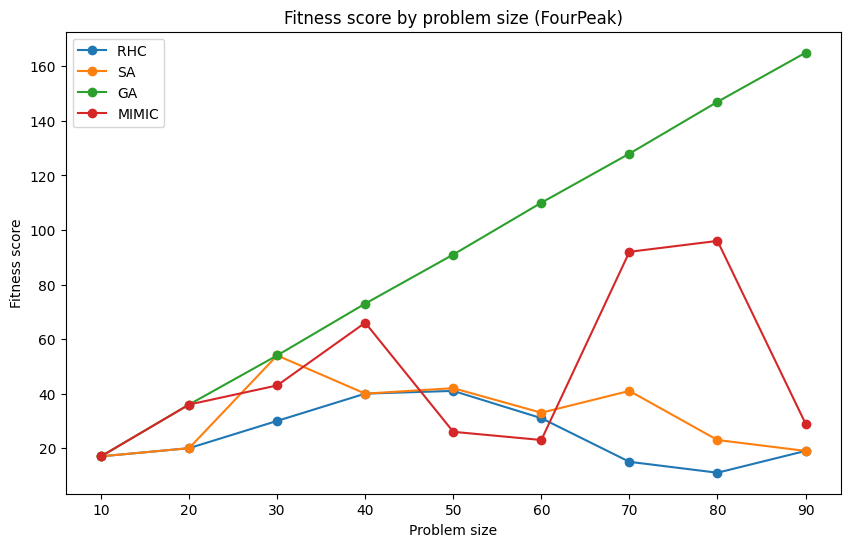

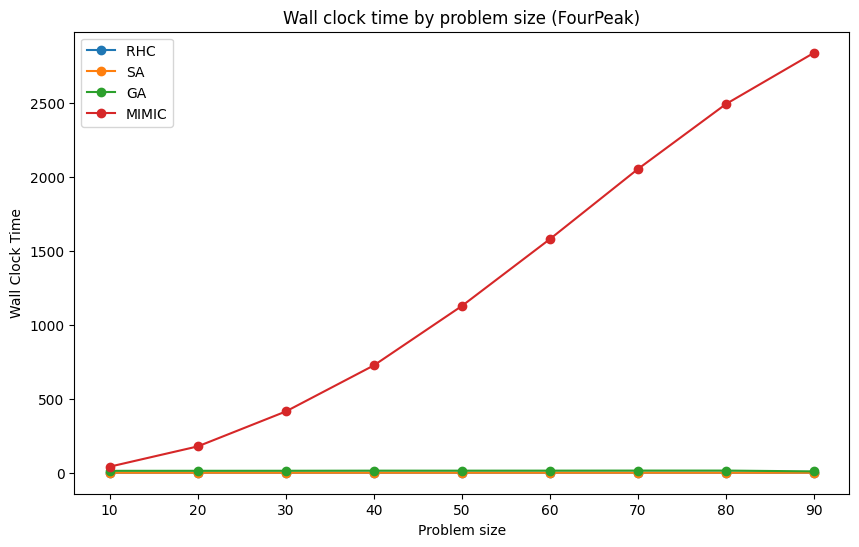

In [62]:
# run experiment
fitness = problem_fourpeaks(0.15)
rhc_score_dict, sa_score_dict, ga_score_dict, mimic_score_dict = run_problem_size_experiment_parallel(fitness)

# generate plots
length = list(range(10, 100, 10))
plot_size_variable_parallel(variable='best_fitness_score', length=length, rhc_score_dict=rhc_score_dict, 
                   sa_score_dict=sa_score_dict, ga_score_dict=ga_score_dict, mimic_score_dict=mimic_score_dict, 
                   title = 'Fitness score by problem size (FourPeak)', y_lab = 'Fitness score', output_path=FOURPEAK_FOLDER_NAME + 'problem_size_fitness.png')

plot_size_variable_parallel(variable='best_wall_clock_time', length=length, rhc_score_dict=rhc_score_dict, 
                   sa_score_dict=sa_score_dict, ga_score_dict=ga_score_dict, mimic_score_dict=mimic_score_dict, 
                   title = 'Wall clock time by problem size (FourPeak)', y_lab = 'Wall Clock Time', output_path=FOURPEAK_FOLDER_NAME + 'problem_size_wall_time.png')

put_pickle_file(FOURPEAK_FOLDER_NAME+'rhc_experiment_dict.pkl', rhc_score_dict)
put_pickle_file(FOURPEAK_FOLDER_NAME+'sa_experiment_dict.pkl', sa_score_dict)
put_pickle_file(FOURPEAK_FOLDER_NAME+'ga_experiment_dict.pkl', ga_score_dict)
put_pickle_file(FOURPEAK_FOLDER_NAME+'mimic_experiment_dict.pkl', mimic_score_dict)


In [3]:
# run experiment
fitness = problem_flipflop()
rhc_score_dict, sa_score_dict, ga_score_dict, mimic_score_dict = run_problem_size_experiment_parallel(fitness)

# generate plots
length = list(range(10, 100, 10))
plot_size_variable_parallel(variable='best_fitness_score', length=length, rhc_score_dict=rhc_score_dict, 
                   sa_score_dict=sa_score_dict, ga_score_dict=ga_score_dict, mimic_score_dict=mimic_score_dict, 
                   title = 'Fitness score by problem size (FlipFlop)', y_lab = 'Fitness score', output_path=FLIPFLOP_FOLDER_NAME + 'problem_size_fitness.png')

plot_size_variable_parallel(variable='best_wall_clock_time', length=length, rhc_score_dict=rhc_score_dict, 
                   sa_score_dict=sa_score_dict, ga_score_dict=ga_score_dict, mimic_score_dict=mimic_score_dict, 
                   title = 'Wall clock time by problem size (FlipFlop)', y_lab = 'Wall Clock Time', output_path=FLIPFLOP_FOLDER_NAME + 'problem_size_wall_time.png')

put_pickle_file(FLIPFLOP_FOLDER_NAME+'rhc_experiment_dict.pkl', rhc_score_dict)
put_pickle_file(FLIPFLOP_FOLDER_NAME+'sa_experiment_dict.pkl', sa_score_dict)
put_pickle_file(FLIPFLOP_FOLDER_NAME+'ga_experiment_dict.pkl', ga_score_dict)
put_pickle_file(FLIPFLOP_FOLDER_NAME+'mimic_experiment_dict.pkl', mimic_score_dict)


RHC Experiment for length: 20
RHC Experiment for length: 80
RHC Experiment for length: 90
RHC Experiment for length: 70
RHC Experiment for length: 60
RHC Experiment for length: 40
RHC Experiment for length: 10
RHC Experiment for length: 50
RHC Experiment for length: 30
SA Experiment for length: 10
SA Experiment for length: 20
SA Experiment for length: 30
SA Experiment for length: 40
SA Experiment for length: 50
SA Experiment for length: 60
SA Experiment for length: 70
SA Experiment for length: 80
SA Experiment for length: 90
GA Experiment for length: 10
GA Experiment for length: 20
GA Experiment for length: 30
GA Experiment for length: 40
GA Experiment for length: 50
GA Experiment for length: 60
GA Experiment for length: 70
GA Experiment for length: 80
GA Experiment for length: 90
MIMIC Experiment for length: 10
MIMIC Experiment for length: 20
MIMIC Experiment for length: 30
MIMIC Experiment for length: 40
MIMIC Experiment for length: 50
MIMIC Experiment for length: 60
MIMIC Experiment

AttributeError: 'list' object has no attribute 'keys'

In [58]:
def plot_size_variable_parallel(variable, length, rhc_score_dict, sa_score_dict, ga_score_dict, mimic_score_dict, title, y_lab, output_path):
    lengths = np.array(length)
    rhc_score_array = np.array([rhc_score_dict[key].get(variable) for key in range(len(rhc_score_dict))])
    sa_score_array = np.array([sa_score_dict[key].get(variable) for key in range(len(sa_score_dict))])
    ga_score_array = np.array([ga_score_dict[key].get(variable) for key in range(len(ga_score_dict))])
    mimic_score_array = np.array([mimic_score_dict[key].get(variable) for key in range(len(mimic_score_dict))])

    plt.figure(figsize=(10, 6))

    plt.plot(lengths, rhc_score_array, label='RHC ', marker='o')
    plt.plot(lengths, sa_score_array, label='SA', marker='o')
    plt.plot(lengths, ga_score_array, label='GA', marker='o')
    plt.plot(lengths, mimic_score_array, label='MIMIC', marker='o')

    # Adding labels and title
    plt.xlabel('Problem size')
    plt.ylabel(y_lab)
    plt.title(title)
    plt.legend()

    # Display the plot
    plt.savefig(output_path)


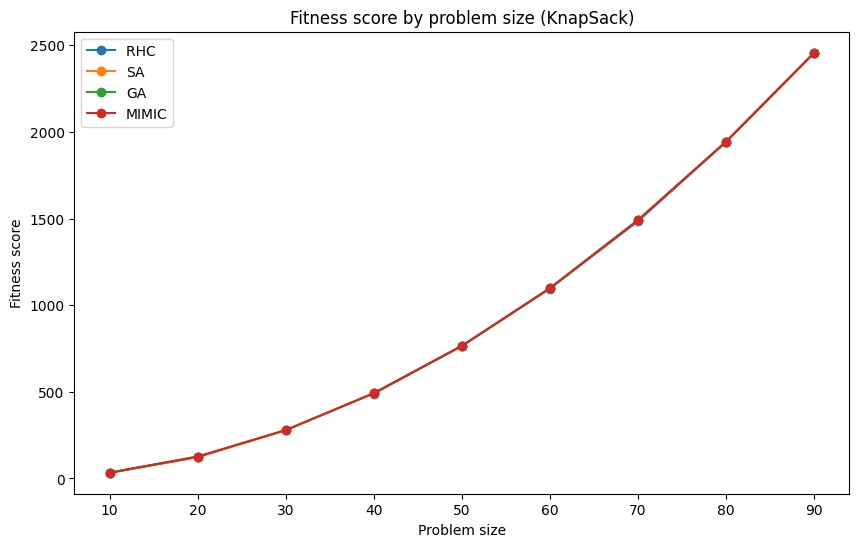

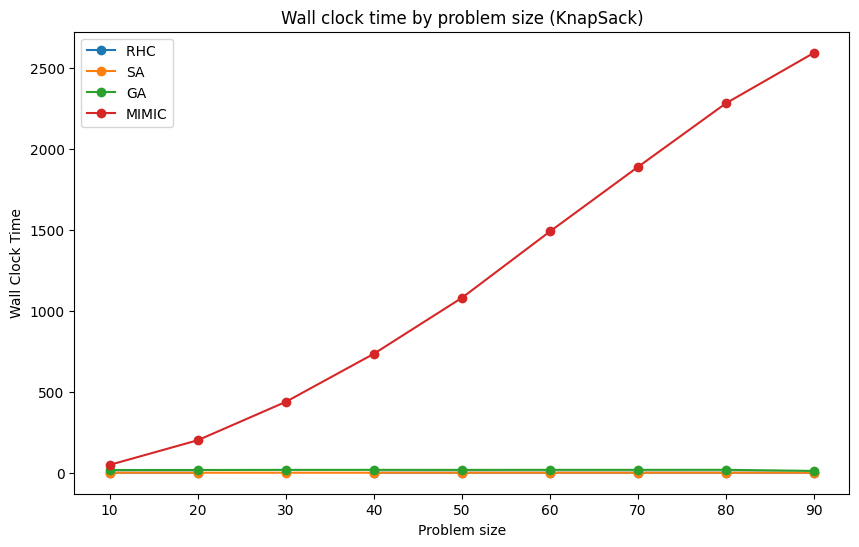

In [59]:
# # run experiment
# def knapsack_fitness(length):
#     return problem_knapsack(weights = list(range(2, length * 2 + 2, 2)),
#                             values = list(range(1,length + 1,1)),
#                             max_weight_pct = 0.6)

# rhc_score_dict, sa_score_dict, ga_score_dict, mimic_score_dict = run_problem_size_experiment_parallel_knapsack(knapsack_fitness)

# generate plots
length = list(range(10, 100, 10))
plot_size_variable_parallel(variable='best_fitness_score', length=length, rhc_score_dict=rhc_score_dict, 
                   sa_score_dict=sa_score_dict, ga_score_dict=ga_score_dict, mimic_score_dict=mimic_score_dict, 
                   title = 'Fitness score by problem size (KnapSack)', y_lab = 'Fitness score', output_path=KNAPSACK_FOLDER_NAME + 'problem_size_fitness.png')

plot_size_variable_parallel(variable='best_wall_clock_time', length=length, rhc_score_dict=rhc_score_dict, 
                   sa_score_dict=sa_score_dict, ga_score_dict=ga_score_dict, mimic_score_dict=mimic_score_dict, 
                   title = 'Wall clock time by problem size (KnapSack)', y_lab = 'Wall Clock Time', output_path=KNAPSACK_FOLDER_NAME + 'problem_size_wall_time.png')

put_pickle_file(KNAPSACK_FOLDER_NAME+'rhc_experiment_dict.pkl', rhc_score_dict)
put_pickle_file(KNAPSACK_FOLDER_NAME+'sa_experiment_dict.pkl', sa_score_dict)
put_pickle_file(KNAPSACK_FOLDER_NAME+'ga_experiment_dict.pkl', ga_score_dict)
put_pickle_file(KNAPSACK_FOLDER_NAME+'mimic_experiment_dict.pkl', mimic_score_dict)



In [272]:
def get_pickle_file(filepath):
    with open(filepath, 'rb') as f:
        return pickle.load(f)


def fitness_mean_std(results):
    # array = [x[1] for x in results]
    return np.mean(results), np.std(results)


def get_best_param(results, params):
    results_only = [x[0] for x in results]
    fitness_by_param = [fitness_mean_std(x) for x in results_only]
    best_param = np.argmax(fitness_by_param, axis=0)[0]

    return params[best_param]
length = 10
p_flipflop = mlrose.DiscreteOpt(length = length, fitness_fn = problem_flipflop(), 
                maximize = True, max_val = 2)
p_knapsack = mlrose.DiscreteOpt(length = length, 
                                fitness_fn = problem_knapsack(weights = list(range(2, length * 2 + 2, 2)),
                                                            values = list(range(1,length + 1,1)),
                                                            max_weight_pct = 0.6), 
                                maximize = True, max_val = 2)
sa_grid = {
        "problem": [p_flipflop, p_knapsack],
        "max_attempt": list(range(10, 200, 5)),
        "max_iter": list(range(10, 2000, 50)),
        "decay": [mlrose.GeomDecay(init_temp=i, decay=j, min_temp=k) for i in list(range(5, 30, 5)) for j in [0.1, 0.3, 0.5, 0.7, 0.9] for k in [0.001, 0.01, 0.1, 0.5]]
    }
params = generate_parameter_list(sa_grid)

sa_results10 = get_pickle_file('src/section1/sa_results10.pkl')

get_best_param(sa_results10, params)
# sa_wt10 = get_pickle_file('src/section1/sa_wt10.pkl')
# sa_wt10

# fitness_mean_std(sa_results10)


# def get_best_param(results, params):
#     results_only = [x[0] for x in results]
#     fitness_by_param = [fitness_mean_std(x) for x in results_only]
#     best_param = np.argmax(fitness_by_param, axis=0)[0]

#     return params[best_param]


{'problem': <mlrose_hiive.opt_probs.discrete_opt.DiscreteOpt at 0x7fed8b816560>,
 'max_attempt': 10,
 'max_iter': 10,
 'decay': GeomDecay(init_temp=5, decay=0.1, min_temp=0.5)}

ValueError: x and y must have same first dimension, but have shapes (9,) and (1,)

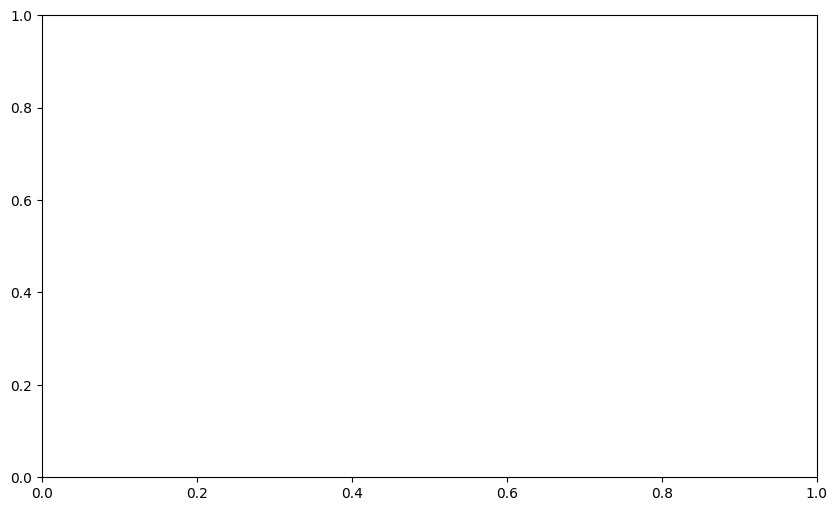

In [274]:
length = list(range(10, 100, 10))
plot_size_variable(variable='best_fitness_score', length=length, rhc_score_dict=rhc_score_dict, 
                   sa_score_dict=sa_score_dict, ga_score_dict=ga_score_dict, mimic_score_dict=mimic_score_dict, 
                   title = 'Fitness score by problem size (Fourpeaks)', y_lab = 'Fitness score', output_path=FOURPEAK_FOLDER_NAME + 'problem_size_fitness.png')

plot_size_variable(variable='best_wall_clock_time', length=length, rhc_score_dict=rhc_score_dict, 
                   sa_score_dict=sa_score_dict, ga_score_dict=ga_score_dict, mimic_score_dict=mimic_score_dict, 
                   title = 'Wall clock time by problem size (Fourpeaks)', y_lab = 'Wall Clock Time', output_path=FOURPEAK_FOLDER_NAME + 'problem_size_wall_time.png')

# plot_size_variable('best_wall_clock_time', length=list(range(10, 100, 10)), rhc_score_dict, sa_score_dict, ga_score_dict, mimic_score_dict, \
#                    title = 'Wall clock time by problem size (Fourpeaks)', y_lab = 'Fitness score', \
#                    output_path=FOURPEAK_FOLDER_NAME + 'problem_size_wall_time.png')

ValueError: x and y must have same first dimension, but have shapes (1,) and (9,)

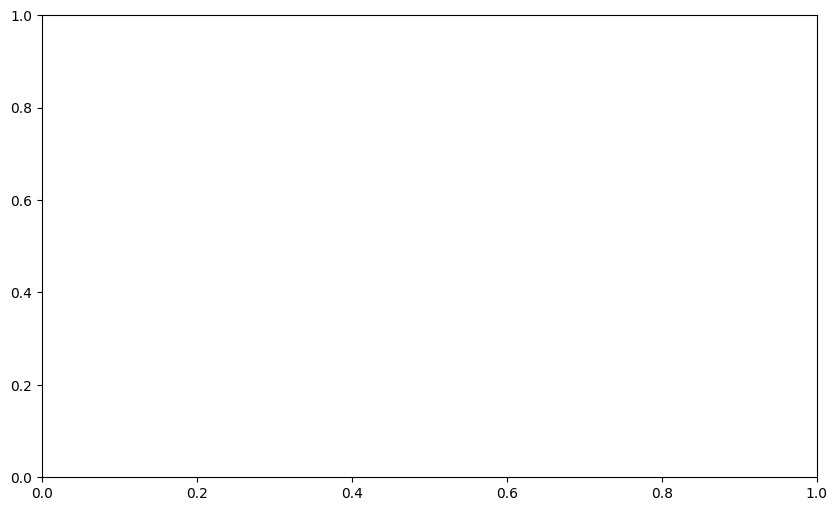

In [214]:
lengths = np.array(length)
rhc_score_array = np.array([rhc_score_dict[key]['best_fitness_score'] for key in rhc_score_dict.keys()])
sa_score_array = np.array([sa_score_dict[key]['best_fitness_score'] for key in sa_score_dict.keys()])
ga_score_array = np.array([ga_score_dict[key]['best_fitness_score'] for key in ga_score_dict.keys()])
mimic_score_array = np.array([mimic_score_dict[key]['best_fitness_score'] for key in mimic_score_dict.keys()])

plt.figure(figsize=(10, 6))

plt.plot(lengths, rhc_score_array, label='RHC ', marker='o')
plt.plot(lengths, sa_score_array, label='SA', marker='o')
plt.plot(lengths, ga_score_array, label='GA', marker='o')
plt.plot(lengths, mimic_score_array, label='MIMIC', marker='o')

# Adding labels and title
plt.xlabel('Problem size')
plt.ylabel('Fitness score')
plt.title('Fitness score by problem size (Fourpeaks)')

# Display the plot
plt.show()

In [ ]:
plot_size_variable('best_fitness_score', length=list(range(10, 100, 10)), rhc_score_dict, sa_score_dict, ga_score_dict, mimic_score_dict, 
                   title = 'Fitness score by problem size (Fourpeaks)', y_lab = 'Fitness score', 
                   output_path=FOURPEAK_FOLDER_NAME + 'problem_size_fitness.png')

plot_size_variable('best_wall_clock_time', length=list(range(10, 100, 10)), rhc_score_dict, sa_score_dict, ga_score_dict, mimic_score_dict, 
                   title = 'Wall clock time by problem size (Fourpeaks)', y_lab = 'Fitness score', 
                   output_path=FOURPEAK_FOLDER_NAME + 'problem_size_wall_time.png')

In [ ]:
fitness = problem_flipflop()
rhc_score_dict, sa_score_dict, ga_score_dict, mimic_score_dict = run_problem_size_experiment_parallel(fitness)

In [ ]:
fitness = problem_flipflop()
rhc_score_dict, sa_score_dict, ga_score_dict, mimic_score_dict = run_problem_size_experiment(fitness)
plot_size_variable('best_fitness_score', length=list(range(10, 100, 10)), rhc_score_dict, sa_score_dict, ga_score_dict, mimic_score_dict, 
                   title = 'Fitness score by problem size (FlipFlop)', y_lab = 'Fitness score', 
                   output_path=FLIPFLOP_FOLDER_NAME + 'problem_size_fitness.png')

plot_size_variable('best_wall_clock_time', length=list(range(10, 100, 10)), rhc_score_dict, sa_score_dict, ga_score_dict, mimic_score_dict, 
                   title = 'Wall clock time by problem size (FlipFlop)', y_lab = 'Fitness score', 
                   output_path=FLIPFLOP_FOLDER_NAME + 'problem_size_wall_time.png')

In [ ]:
fitness = problem_knapsack()
rhc_score_dict, sa_score_dict, ga_score_dict, mimic_score_dict = run_problem_size_experiment(fitness)
plot_size_variable('best_fitness_score', length=list(range(10, 100, 10)), rhc_score_dict, sa_score_dict, ga_score_dict, mimic_score_dict, 
                   title = 'Fitness score by problem size (Knapsack)', y_lab = 'Fitness score', 
                   output_path=KNAPSACK_FOLDER_NAME + 'problem_size_fitness.png')

plot_size_variable('best_wall_clock_time', length=list(range(10, 100, 10)), rhc_score_dict, sa_score_dict, ga_score_dict, mimic_score_dict, 
                   title = 'Wall clock time by problem size (Knapsack)', y_lab = 'Fitness score', 
                   output_path=KNAPSACK_FOLDER_NAME + 'problem_size_wall_time.png')

In [99]:
for length in n_length_trial:
    fitness_fourpeaks = problem_fourpeaks(t_pct = t_pct)
    problem = mlrose.DiscreteOpt(length = length, fitness_fn = fitness_fourpeaks,
                             maximize = True, max_val = 2)
    schedule = mlrose.ExpDecay()

    # RHC
    elapsed_time_rhc, output_rhc = CalcTime(RHC, problem, max_attempts=10, max_iters=10, random_state=SEED_NUM)
    state_rhc, fitness_rhc, fitness_curve_rhc = output_rhc

    # GA
    elapsed_time_rhc, output_rhc = CalcTime(GA, problem, pop_size, mutate_prob, max_attempt, random_state)
    state_rhc, fitness_rhc, fitness_curve_rhc = output_rhc
    

In [ ]:
"""
1. explore package and choose three optimization problems
2. run RHC, SA, GA and MIMIC on chosen optimization problems
3. choose appropriate problems that will highlight one of the respective algorithms
"""

## Section 2: Compare backprop to RHC, SA and GA using A1 dataset
1. freeze architecture from A1 (hidden layer size, activation functions, input / output layers, etc.) and use each of the RO algorithms as a backprop replacement for weight updates.

In [226]:
len(list(range(2, 42, 2)))

20

In [227]:
len(list(range(2, 42, 2)))

20